## Universidad del Valle de Guatemala

### Integrantes
Juan Manuel Marroquin Alfaro 19845 <br>
Carlos Alberto Raxtúm Ramos 19721 <br>
Jose Abraham Gutierrez Corado 19111 <br>
Walter Danilo Saldaña Salguero 19897 <br>
Javier Alejandro Cotto Argueta 19324 <br>

# Proyecto #1
Sección 20<br>
23/05/2022

In [1]:
import os
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.stats import norm
import seaborn as sns
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
from kmodes import kmodes
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
#import pyclustertend 
import random
#from yellowbrick.cluster import SilhouetteVisualizer
#from yellowbrick.datasets import load_nfl
import scipy.stats as stats
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
#%matplotlib inline

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
#load dataset
matrimonios = pd.read_csv('./Archivos/matrimonios.csv',low_memory=False)

In [4]:
#convertir los datos de strings a enteros
matrimonios['edadhom'] = pd.to_numeric(matrimonios['edadhom'],errors='coerce', downcast="integer")
matrimonios['edadmuj'] = pd.to_numeric(matrimonios['edadmuj'],errors='coerce', downcast="integer")
matrimonios['anoreg'] = pd.to_numeric(matrimonios['anoreg'],errors='coerce', downcast="integer")
matrimonios['nunuho'] = pd.to_numeric(matrimonios['nunuho'],errors='coerce', downcast="integer")
matrimonios['nunumu'] = pd.to_numeric(matrimonios['nunumu'],errors='coerce', downcast="integer")
       
matrimonios['edadhom'] = matrimonios['edadhom'].apply(pd.to_numeric, downcast='float')
matrimonios['edadmuj'] = matrimonios['edadmuj'].apply(pd.to_numeric, downcast='float')
matrimonios['anoocu'] = matrimonios['anoocu'].apply(pd.to_numeric, downcast='float')


matrimonios["clauni"]= matrimonios["clauni"].replace(
    ['Comunidad de gananciales','Matrimonio','Comunidad absoluta','No especificado','Separación absoluta'],
                                                     [0,1,2,3,4],regex=True)
#remplacar los nombres de los meses por numeros
matrimonios["mesocu"]= matrimonios["mesocu"].replace(
    ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre'],
    [1,2,3,4,5,6,7,8,9,10,11,12],regex=True)
#remplacar los nombres de los departamentos por numeros
matrimonios["depocu"]= matrimonios["depocu"].replace(
    ['Guatemala','El Progreso','Jalapa','Izabal','Baja Verapaz','Sacatepéquez','Sacatepequez',
     'Peten','Petén','Jutiapa','Alta Verapaz','San Marcos','Solola','Sololá','Totonicapan','Totonicapán','Suchitepequez','Suchitepéquez',
    'Quetzaltenango','Huehuetenango','Quiche','Quiché','Chimaltenango','Chiquimula','Retalhuleu','Zacapa','Santa Rosa','Escuintla'],
    [1,2,3,4,5,6,6,7,7,8,9,10,11,11,12,12,13,13,14,15,16,16,17,18,19,20,21,22],regex=True)
#quedarse con un valor de mestizo y ladino
matrimonios["puehom"]=matrimonios.puehom.str.split('/').str[0]
matrimonios["puemuj"]=matrimonios.puemuj.str.split('/').str[0]
#convertir de string a un numero categorico para poder hacer clusters
matrimonios["puehom"]= matrimonios["puehom"].replace(
    ['Ignorado','Mestizo','Maya','Indigena','No indigena','No Indigena','Ladino','Otro','Garífuna','Xinka'],
                                                     [0,1,2,3,4,4,5,6,7,8],regex=True)
matrimonios["puemuj"]= matrimonios["puemuj"].replace(
    ['Ignorado','Mestizo','Maya','Indigena','No indigena','No Indigena','Ladino','Otro','Garífuna','Xinka'],
                                                     [0,1,2,3,4,4,5,6,7,8],regex=True)
#convertir de string a un numero categorico para poder hacer clusters
matrimonios["eschom"]= matrimonios["eschom"].replace(
    ['Ninguno','Ignorado','Primaria','Básico','Diversificado','DIversificado','Universitario','Postgrado','Post Grado'],
                                                     [0,99,1,2,3,3,4,5,5],regex=True)

matrimonios["escmuj"]= matrimonios["escmuj"].replace(
    ['Ninguno','Ignorado','Primaria','Básico','Diversificado','DIversificado','Universitario','Postgrado','Post Grado'],
                                                     [0,99,1,2,3,3,4,5,5],regex=True)

#crear columna con diferencia de edad
matrimonios['edad_dif'] = abs(matrimonios['edadhom'] - matrimonios['edadmuj'])

#quitar los valores de NaN
matrimonios['nunumu'] = matrimonios['nunumu'].fillna(0)
matrimonios['nunuho'] = matrimonios['nunuho'].fillna(0)
matrimonios['puehom'] = matrimonios['puehom'].fillna(0)
matrimonios['puemuj'] = matrimonios['puemuj'].fillna(0)
matrimonios['eschom'] = matrimonios['eschom'].fillna(0)
matrimonios['escmuj'] = matrimonios['escmuj'].fillna(0)

In [5]:
#convertir los datos de strings a enteros
#matrimonios['edadhom'] = pd.to_numeric(matrimonios['edadhom'],errors='coerce', downcast="integer")
#matrimonios['edadmuj'] = pd.to_numeric(matrimonios['edadmuj'],errors='coerce', downcast="integer")
#matrimonios['anoreg'] = pd.to_numeric(matrimonios['anoreg'],errors='coerce', downcast="integer")
#matrimonios['nunuho'] = pd.to_numeric(matrimonios['nunuho'],errors='coerce', downcast="integer")
#matrimonios['nunumu'] = pd.to_numeric(matrimonios['nunumu'],errors='coerce', downcast="integer")

In [6]:
#quedarse con un valor de mestizo y ladino
#matrimonios["puehom"]=matrimonios.puehom.str.split('/').str[0]
#matrimonios["puemuj"]=matrimonios.puemuj.str.split('/').str[0]

In [7]:
#crear columna con diferencia de edad
matrimonios['edad_dif'] = abs(matrimonios['edadhom'] - matrimonios['edadmuj'])

In [8]:
matrimonios.head()

,depreg,mupreg,mesreg,anoreg,clauni,edadhom,edadmuj,puehom,puemuj,nachom,nacmuj,ciuohom,ciuomuj,nunuho,nunumu,depocu,mupocu,mesocu,anoocu,areagocu,eschom,escmuj,diaocu,edad_dif
0,San Marcos,Comitancillo,Abril,2010,1,16.0,14.0,3,3,Guatemala,Guatemala,Ignorado,Ignorado,0.0,0.0,10,Comitancillo,9,2009.0,Ignorado,0.0,0.0,NaN,2.0
1,Retalhuleu,Retalhuleu,Mayo,2009,1,16.0,14.0,0,0,Guatemala,Guatemala,Agricultores y trabajadores calificados de cul...,Oficios domésticos no remunerados,0.0,0.0,19,Retalhuleu,3,2009.0,Ignorado,0.0,0.0,NaN,2.0
2,Huehuetenango,Chiantla,Enero,2010,1,16.0,14.0,0,0,Guatemala,Guatemala,Agricultores y trabajadores calificados de cul...,Oficios domésticos no remunerados,1.0,1.0,15,Chiantla,12,2009.0,Ignorado,0.0,0.0,NaN,2.0
3,Quiche,Joyabaj,Agosto,2009,1,16.0,14.0,3,3,Guatemala,Guatemala,Agricultores y trabajadores calificados de cul...,Oficios domésticos no remunerados,1.0,1.0,16,Joyabaj,7,2009.0,Ignorado,0.0,0.0,NaN,2.0
4,Quiche,Joyabaj,Octubre,2009,1,16.0,14.0,3,3,Guatemala,Guatemala,Agricultores y trabajadores calificados de cul...,Oficios domésticos no remunerados,1.0,1.0,16,Joyabaj,10,2009.0,Ignorado,0.0,0.0,NaN,2.0


In [9]:
#anoreg,diaocu
cuantitativas_mat = [ 'anoreg','mesocu','depocu','edadhom', 'edadmuj',
                     'nunuho', 'nunumu', 'puehom','puemuj','eschom','escmuj','edad_dif','clauni']

In [10]:
#create df just with the columns that we belive are usefull
matrimonios = matrimonios[cuantitativas_mat]

In [11]:
#function that get outliers from multiple columns
#return a list of index of outliers
def get_outlier(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    low_bound = Q1 - 1.5 * IQR
    up_bound = Q3 + 1.5 * IQR
    
    outlier_list = df.index[(df[col] < low_bound) | (df[col] > up_bound)]
    
    return outlier_list

In [12]:
#function that remove the outliers based on the list
#return a cleaned data frame

def remove_outliers(df,outliers_list):
    outliers_list = sorted(set(outliers_list))
    df = df.drop(outliers_list)
    
    return df

In [13]:
# create a empty list to recolet the index
# for inside columns list to get the index
index_list = []
for col in matrimonios[['edadhom', 'edadmuj','edad_dif']]:
    index_list.extend(get_outlier(matrimonios,col))

In [14]:
#clean the df
matrimonios = remove_outliers(matrimonios,index_list)

In [15]:
matrimonios.reset_index(drop=True, inplace=True)

In [16]:
'''
def normalizer(column):
    return (column - column.mean())/(column.std())

for col in matrimonios[cuantitativas_mat]:
    matrimonios[col] = normalizer(matrimonios[col])
'''

'\ndef normalizer(column):\n    return (column - column.mean())/(column.std())\n\nfor col in matrimonios[cuantitativas_mat]:\n    matrimonios[col] = normalizer(matrimonios[col])\n'

In [17]:
matrimonios = matrimonios.dropna(subset=['nunuho', 'nunumu'])
matrimonios = matrimonios.fillna("0")

In [18]:
# re convertir estas columnas a float por si las flies
matrimonios['edadhom'] = matrimonios['edadhom'].apply(pd.to_numeric, downcast='float')
matrimonios['edadmuj'] = matrimonios['edadmuj'].apply(pd.to_numeric, downcast='float')
matrimonios['anoreg'] = matrimonios['anoreg'].apply(pd.to_numeric, downcast='float')
matrimonios['edad_dif'] = matrimonios['edad_dif'].apply(pd.to_numeric, downcast='float')

# ------------------------------------------------------------------------------------------------------------

In [19]:
drop_colummns = ['nunuho','nunumu']
matrimonios = matrimonios.drop(drop_colummns, axis=1)

<AxesSubplot:>

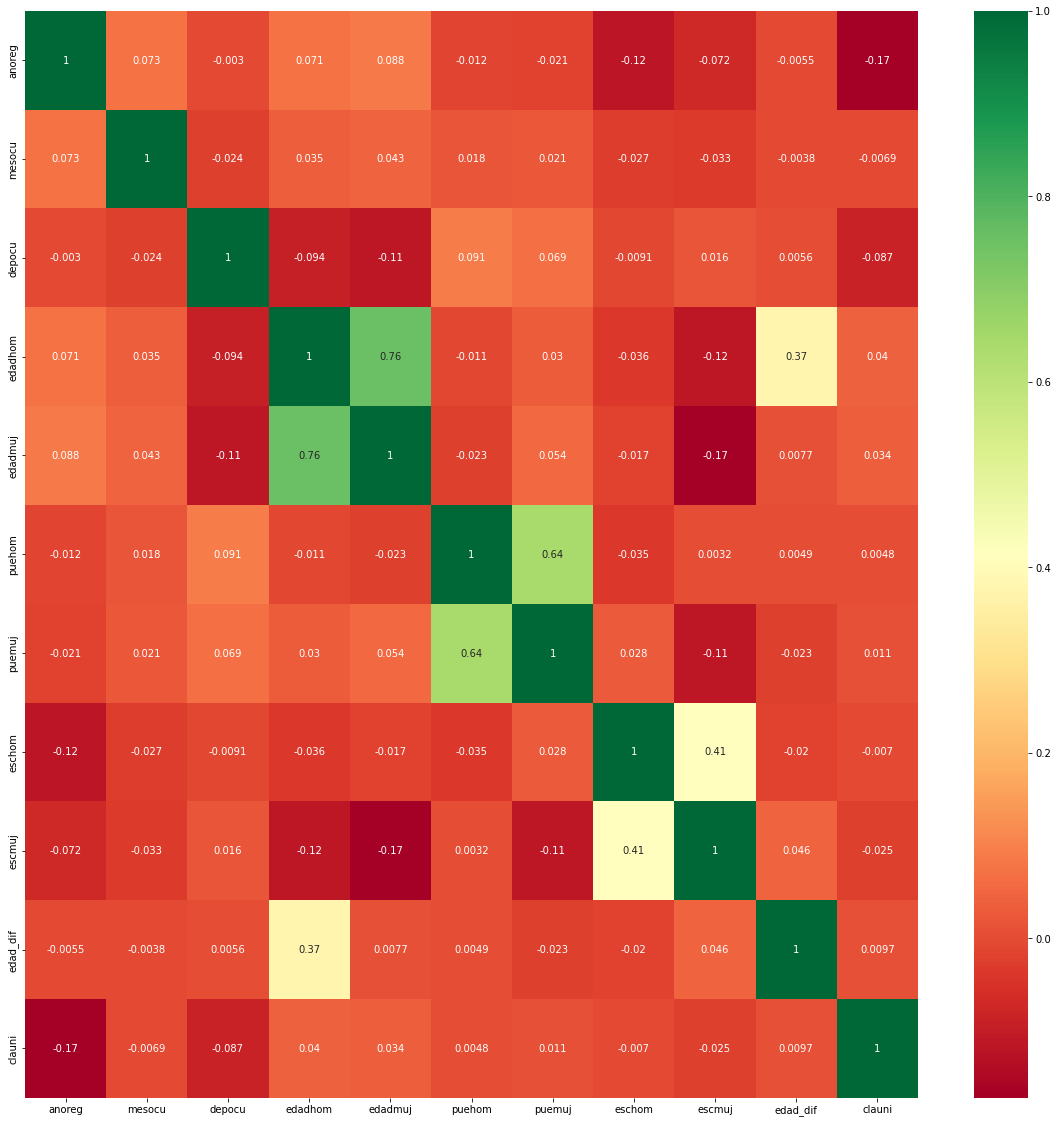

In [20]:
data_corr = matrimonios.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
cmap = plt.get_cmap('RdYlGn').copy()
cmap.set_bad('lightblue')
sns.heatmap(data_corr, xticklabels=data_corr.columns, yticklabels=data_corr.columns,annot=True, ax=ax,cmap=cmap)

In [21]:
matrimonios.shape

(807387, 11)

### Crear Muestra significativa

In [22]:
sample = matrimonios.copy()
Num_sample = 3394
#crear lista vacia y recorer las columnas, 
list_of_columns = []
for col in matrimonios.columns:
    list_of_columns.append(sample[col])
    
#crear una nueva columan haciendo un zip de todas las columnas
sample["combinados"] = list(zip(*list_of_columns))

#crear un df con el value_counts de las combinaciones
combined_weight = sample['combinados'].value_counts(normalize=True)
#crear una columnna usuando el valor de cada combinacion
sample['peso_combinado'] = sample['combinados'].apply(lambda x: combined_weight[x])
#crear un sample de 25 muestras usando como peso las combinaciones
sample = sample.sample(Num_sample, weights=sample['peso_combinado'])
sample = sample.drop(["peso_combinado"], axis=1)

sample.describe()

,anoreg,mesocu,depocu,edadhom,edadmuj,puehom,puemuj,eschom,escmuj,edad_dif,clauni
count,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000
mean,2014.521214,6.628757,10.012080,25.439010,23.228049,1.489393,1.408368,5.917207,10.849146,3.513553,0.290218
std,1.755373,3.599466,6.661548,6.126091,6.042328,0.979320,1.052694,19.699270,28.469728,2.962875,0.830656
min,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,3.000000,3.000000,21.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,2015.000000,7.000000,10.000000,24.000000,22.000000,1.000000,1.000000,2.000000,2.000000,3.000000,0.000000
75%,2015.000000,10.000000,15.000000,29.000000,26.000000,2.000000,2.000000,3.000000,3.000000,5.000000,0.000000
max,2021.000000,12.000000,22.000000,47.000000,44.000000,8.000000,6.000000,99.000000,99.000000,13.000000,4.000000


<AxesSubplot:>

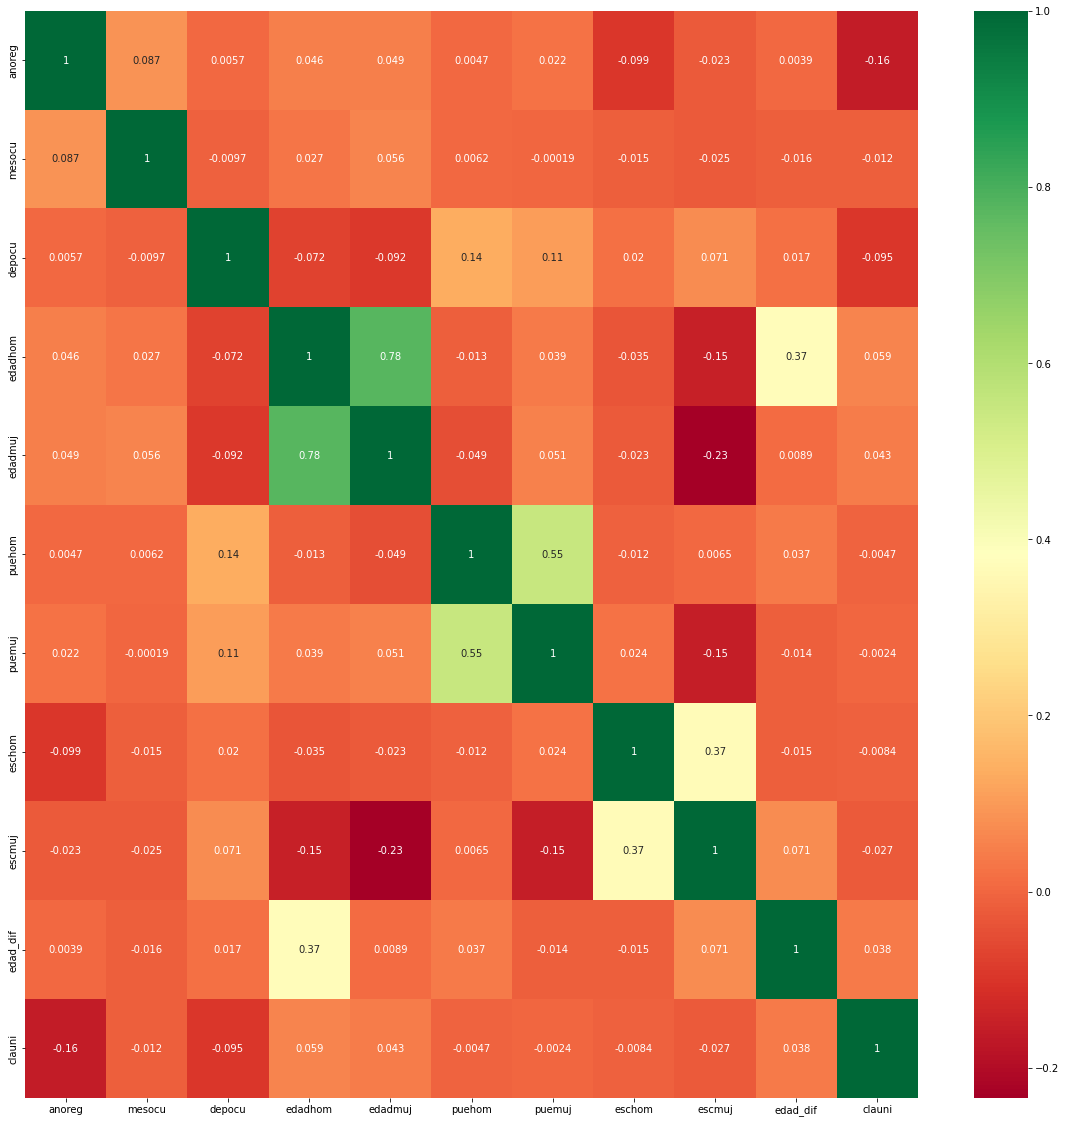

In [23]:
data_corr1 = sample.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
cmap = plt.get_cmap('RdYlGn').copy()
cmap.set_bad('lightblue')
sns.heatmap(data_corr1, xticklabels=data_corr.columns, yticklabels=data_corr.columns,annot=True, ax=ax,cmap=cmap)

In [24]:
#df con casamientos registrados hasta 2016
mat09_16 = matrimonios[matrimonios['anoreg']<2017]

In [25]:
#df con casamientos registrados despues 2016
mat17_20 = matrimonios[matrimonios['anoreg']>2016]

In [26]:
mat09_16.shape

(756580, 11)

In [27]:
mat17_20.shape

(50807, 11)

## K means Edades Hombre vs Mujeres

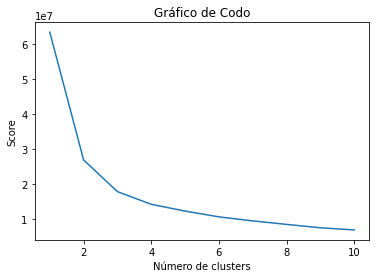

In [30]:
edades = matrimonios[["edadhom","edadmuj"]]
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(edades)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

In [31]:
kmeans = cluster.KMeans(n_clusters = 3,random_state = 20)
#X = df[['SalePrice','OverallQual','YearBuilt','GarageYrBlt','GarageCars','GrLivArea','GarageArea','YearRemodAdd']]
X = np.array(matrimonios[["edadhom","edadmuj"]])
X = sklearn.preprocessing.scale(X)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=20)

In [32]:
centroides = kmeans.cluster_centers_
y_kmeans = kmeans.predict(X)

C:\Users\melma\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


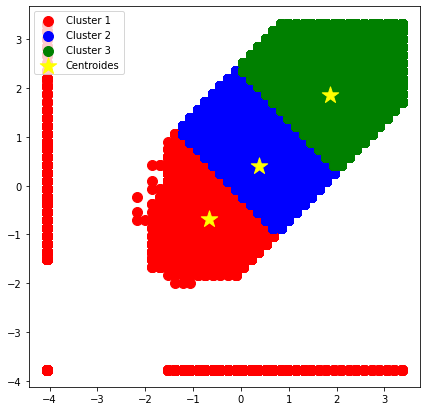

In [33]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.legend()

## K modes Pueblo Hombre vs Mujeres

In [34]:
pueblos = sample[["puehom","puemuj"]]
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmodes = KModes(n_clusters=i, init='Huang', n_init=5, verbose=0)
    kmodes.fit_predict(pueblos)
    wcss.append(kmodes.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

AttributeError: 'KModes' object has no attribute 'inertia_'

In [35]:
kmodes1 = KModes(n_clusters=3, init='Huang', n_init=5, verbose=0)
#X = df[['SalePrice','OverallQual','YearBuilt','GarageYrBlt','GarageCars','GrLivArea','GarageArea','YearRemodAdd']]
X = np.array(sample[["puehom","puemuj"]])
X = sklearn.preprocessing.scale(X)
kmodes1.fit_predict(X)

array([0, 0, 1, ..., 0, 1, 0], dtype=uint16)

In [36]:
centroides1 = kmodes1.cluster_centroids_
y_kmodes1 = kmodes1.predict(X)

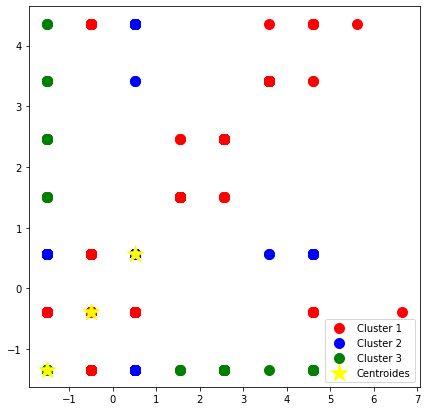

In [37]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.scatter(X[y_kmodes1 == 0, 0], X[y_kmodes1 == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[y_kmodes1 == 1, 0], X[y_kmodes1 == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[y_kmodes1 == 2, 0], X[y_kmodes1 == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(kmodes1.cluster_centroids_[:,0],kmodes1.cluster_centroids_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.legend()

## K means Escolaridad Hombre vs Mujeres

In [38]:
kmodes2 = KModes(n_clusters=3, init='Huang', n_init=5, verbose=0)
#X = df[['SalePrice','OverallQual','YearBuilt','GarageYrBlt','GarageCars','GrLivArea','GarageArea','YearRemodAdd']]
X = np.array(sample[["eschom","escmuj"]])
X = sklearn.preprocessing.scale(X)
kmodes2.fit_predict(X)

array([1, 1, 0, ..., 1, 2, 0], dtype=uint16)

In [39]:
centroides2 = kmodes2.cluster_centroids_
y_kmodes2 = kmodes2.predict(X)

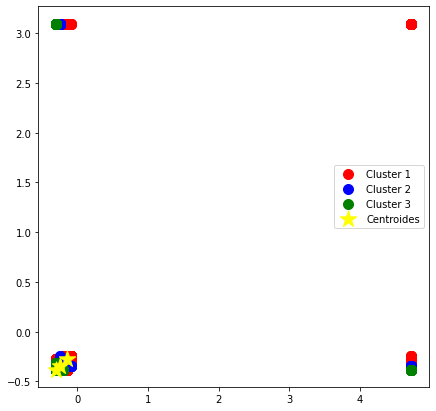

In [40]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.scatter(X[y_kmodes2 == 0, 0], X[y_kmodes2 == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[y_kmodes2 == 1, 0], X[y_kmodes2 == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[y_kmodes2 == 2, 0], X[y_kmodes2 == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(kmodes2.cluster_centroids_[:,0],kmodes2.cluster_centroids_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.legend()

## K means Edades Hombre y Mujeres vs Diferencia de edades

In [42]:
kmeans3 = cluster.KMeans(n_clusters = 3,random_state = 20)
#X = df[['SalePrice','OverallQual','YearBuilt','GarageYrBlt','GarageCars','GrLivArea','GarageArea','YearRemodAdd']]
X = np.array(matrimonios[["edadhom","edadmuj","edad_dif"]])
X = sklearn.preprocessing.scale(X)
kmeans3.fit(X)

KMeans(n_clusters=3, random_state=20)

In [43]:
centroides3 = kmeans3.cluster_centers_
y_kmeans3 = kmeans3.predict(X)

C:\Users\melma\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


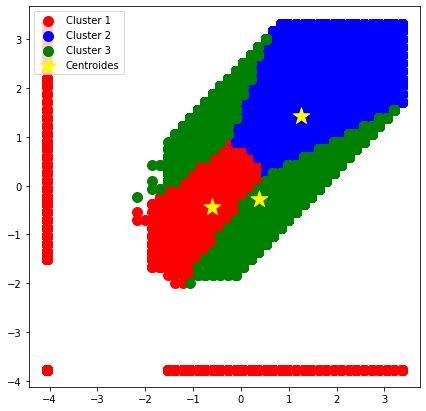

In [44]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.scatter(X[y_kmeans3 == 0, 0], X[y_kmeans3 == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[y_kmeans3 == 1, 0], X[y_kmeans3 == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[y_kmeans3 == 2, 0], X[y_kmeans3 == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(kmeans3.cluster_centers_[:,0],kmeans3.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.legend()

## K modes Pueblo Hombre y Mujeres vs Departamento

In [46]:
kmodes4 = KModes(n_clusters=3, init='Huang', n_init=5, verbose=0)
#X = df[['SalePrice','OverallQual','YearBuilt','GarageYrBlt','GarageCars','GrLivArea','GarageArea','YearRemodAdd']]
X = np.array(sample[["puehom","puemuj","depocu"]])
X = sklearn.preprocessing.scale(X)
kmodes4.fit_predict(X)

array([0, 1, 0, ..., 1, 0, 1], dtype=uint16)

In [47]:
centroides4 = kmodes4.cluster_centroids_
y_kmodes4 = kmodes4.predict(X)

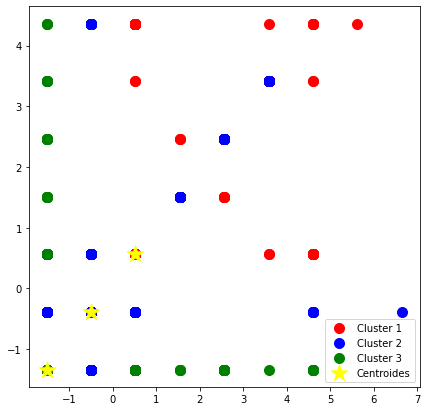

In [48]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.scatter(X[y_kmodes4 == 0, 0], X[y_kmodes4 == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[y_kmodes4 == 1, 0], X[y_kmodes4 == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[y_kmodes4 == 2, 0], X[y_kmodes4 == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(kmodes4.cluster_centroids_[:,0],kmodes4.cluster_centroids_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.legend()

## K means Edad Hombre  vs Escolaridad Hombre

In [49]:
kmodes5 = KPrototypes(n_clusters=3, init='Huang', n_init=5, verbose=0)
#X = df[['SalePrice','OverallQual','YearBuilt','GarageYrBlt','GarageCars','GrLivArea','GarageArea','YearRemodAdd']]
X = np.array(sample[["edadhom","eschom"]])
X = sklearn.preprocessing.scale(X)
kmodes5.fit_predict(X,categorical=[1])

array([2, 2, 1, ..., 0, 2, 0], dtype=uint16)

In [50]:
centroides5 = kmodes5.cluster_centroids_ 
y_kmodes5 = kmodes5.predict(X,categorical=[1])

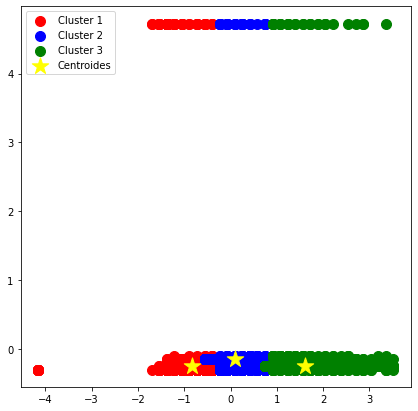

In [51]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.scatter(X[y_kmodes5 == 0, 0], X[y_kmodes5 == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[y_kmodes5 == 1, 0], X[y_kmodes5 == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[y_kmodes5 == 2, 0], X[y_kmodes5 == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(kmodes5.cluster_centroids_[:,0],kmodes5.cluster_centroids_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.legend()

## K means Edad Mujeres  vs Escolaridad Mujeres

In [52]:
kmeans6 = KPrototypes(n_clusters=3, init='Huang', n_init=5, verbose=0)
#X = df[['SalePrice','OverallQual','YearBuilt','GarageYrBlt','GarageCars','GrLivArea','GarageArea','YearRemodAdd']]
X = np.array(sample[["edadmuj","escmuj"]])
X = sklearn.preprocessing.scale(X)
kmeans6.fit_predict(X,categorical=[1])

array([2, 1, 2, ..., 0, 1, 2], dtype=uint16)

In [53]:
centroides6 = kmeans6.cluster_centroids_
y_kmodes6 = kmeans6.predict(X,categorical=[1])

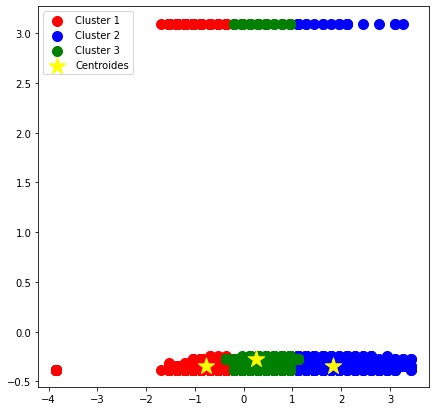

In [54]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.scatter(X[y_kmodes6 == 0, 0], X[y_kmodes6 == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[y_kmodes6 == 1, 0], X[y_kmodes6 == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[y_kmodes6 == 2, 0], X[y_kmodes6 == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(kmeans6.cluster_centroids_[:,0],kmeans6.cluster_centroids_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.legend()

## K means Edad Mujeres y Hombres  vs Escolaridad Mujeres y Hombres

In [55]:
kmodes7 = KPrototypes(n_clusters=3, init='Huang', n_init=5, verbose=0)
#X = df[['SalePrice','OverallQual','YearBuilt','GarageYrBlt','GarageCars','GrLivArea','GarageArea','YearRemodAdd']]
X = np.array(sample[["edadmuj","escmuj","edadhom","eschom"]])
X = sklearn.preprocessing.scale(X)
kmodes7.fit_predict(X,categorical=[1,3])

array([2, 2, 0, ..., 1, 2, 0], dtype=uint16)

In [56]:
centroides7 = kmodes7.cluster_centroids_
y_kmodes7 = kmodes7.predict(X,categorical=[1,3])

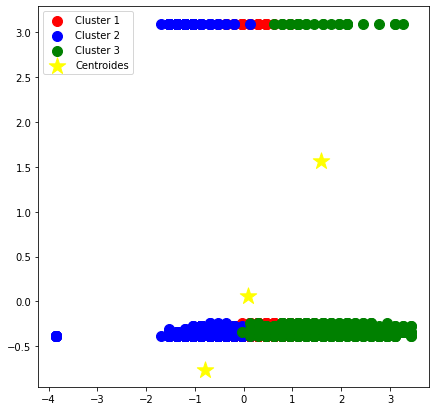

In [57]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.scatter(X[y_kmodes7 == 0, 0], X[y_kmodes7 == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[y_kmodes7 == 1, 0], X[y_kmodes7 == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[y_kmodes7 == 2, 0], X[y_kmodes7 == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(kmodes7.cluster_centroids_[:,0],kmodes7.cluster_centroids_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.legend()

## K modes Edad Mujeres y Hombres  vs Clauni

In [58]:
kmodes9 = KPrototypes(n_clusters=3, init='Huang', n_init=5, verbose=0)
#X = df[['SalePrice','OverallQual','YearBuilt','GarageYrBlt','GarageCars','GrLivArea','GarageArea','YearRemodAdd']]
X = np.array(sample[["edadmuj","edadhom","clauni"]])
X = sklearn.preprocessing.scale(X)
kmodes9.fit_predict(X,categorical=[2])

array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

In [59]:
centroides9= kmodes9.cluster_centroids_
y_kmodes9 = kmodes9.predict(X,categorical=[2])

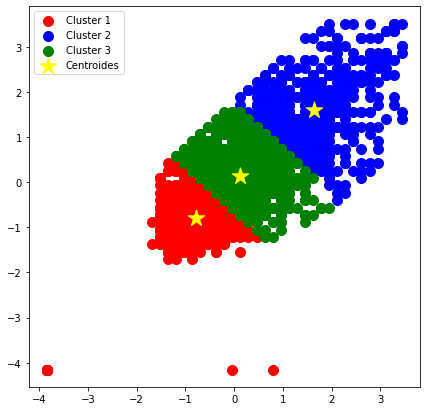

In [60]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.scatter(X[y_kmodes9 == 0, 0], X[y_kmodes9 == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[y_kmodes9 == 1, 0], X[y_kmodes9 == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[y_kmodes9 == 2, 0], X[y_kmodes9 == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(kmodes9.cluster_centroids_[:,0],kmodes9.cluster_centroids_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.legend()

## K modes Edad Hombres y Mujeres vs Educacion Hombres y Mujeres vs Clauni

In [61]:
kmodes10 = KPrototypes(n_clusters=3, init='Huang', n_init=5, verbose=0)
#X = df[['SalePrice','OverallQual','YearBuilt','GarageYrBlt','GarageCars','GrLivArea','GarageArea','YearRemodAdd']]
X = np.array(sample[["edadmuj","escmuj","edadhom","eschom","clauni"]])
X = sklearn.preprocessing.scale(X)
kmodes10.fit_predict(X,categorical=[1,3,4])

array([0, 0, 2, ..., 1, 0, 2], dtype=uint16)

In [62]:
centroides10= kmodes10.cluster_centroids_
y_kmodes10 = kmodes10.predict(X,categorical=[1,3,4])

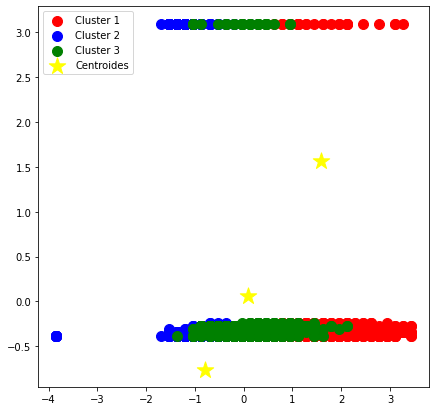

In [63]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.scatter(X[y_kmodes10 == 0, 0], X[y_kmodes10 == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[y_kmodes10 == 1, 0], X[y_kmodes10 == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[y_kmodes10 == 2, 0], X[y_kmodes10 == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(kmodes10.cluster_centroids_[:,0],kmodes10.cluster_centroids_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.legend()

## K modes Edad Hombres y Mujeres vs Pueblo Hombres y Mujeres vs Clauni

In [64]:
kmodes10 = KPrototypes(n_clusters=3, init='Huang', n_init=5, verbose=0)
#X = df[['SalePrice','OverallQual','YearBuilt','GarageYrBlt','GarageCars','GrLivArea','GarageArea','YearRemodAdd']]
X = np.array(sample[["edadmuj","puemuj","edadhom","puehom","clauni"]])
X = sklearn.preprocessing.scale(X)
kmodes10.fit_predict(X,categorical=[1,3,4])

array([2, 2, 0, ..., 0, 2, 1], dtype=uint16)

In [65]:
centroides10= kmodes10.cluster_centroids_
y_kmodes10 = kmodes10.predict(X,categorical=[1,3,4])

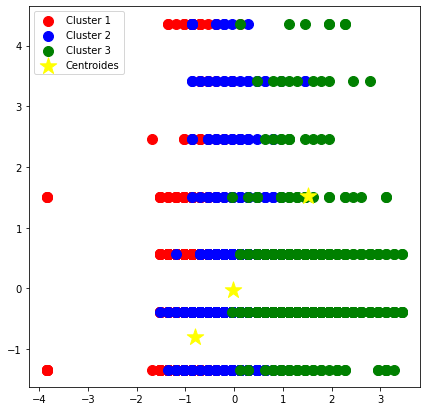

In [66]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.scatter(X[y_kmodes10 == 0, 0], X[y_kmodes10 == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[y_kmodes10 == 1, 0], X[y_kmodes10 == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[y_kmodes10 == 2, 0], X[y_kmodes10 == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(kmodes10.cluster_centroids_[:,0],kmodes10.cluster_centroids_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.legend()

## K modes Pueblo Hombres y Mujeres vs Clauni

In [67]:
kmodes4 = KModes(n_clusters=3, init='Huang', n_init=5, verbose=0)
#X = df[['SalePrice','OverallQual','YearBuilt','GarageYrBlt','GarageCars','GrLivArea','GarageArea','YearRemodAdd']]
X = np.array(sample[["puehom","puemuj","clauni"]])
X = sklearn.preprocessing.scale(X)
kmodes4.fit_predict(X)

array([0, 1, 0, ..., 0, 0, 1], dtype=uint16)

In [68]:
centroides4 = kmodes4.cluster_centroids_
y_kmodes4 = kmodes4.predict(X)

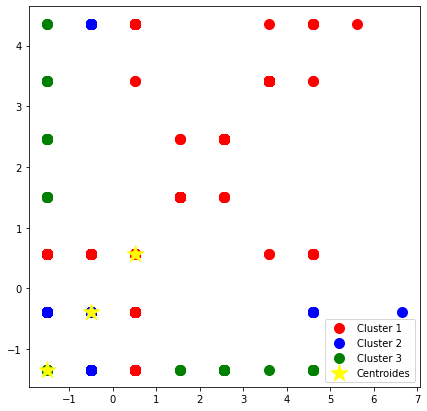

In [69]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.scatter(X[y_kmodes4 == 0, 0], X[y_kmodes4 == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[y_kmodes4 == 1, 0], X[y_kmodes4 == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[y_kmodes4 == 2, 0], X[y_kmodes4 == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(kmodes4.cluster_centroids_[:,0],kmodes4.cluster_centroids_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.legend()

## K modes Escolarida Hombres y Mujeres vs Clauni vs Departamento

In [70]:
kmodes4 = KModes(n_clusters=3, init='Huang', n_init=5, verbose=0)
#X = df[['SalePrice','OverallQual','YearBuilt','GarageYrBlt','GarageCars','GrLivArea','GarageArea','YearRemodAdd']]
X = np.array(sample[["eschom","escmuj","clauni","depocu"]])
X = sklearn.preprocessing.scale(X)
kmodes4.fit_predict(X)

array([0, 0, 2, ..., 0, 0, 1], dtype=uint16)

In [71]:
centroides4 = kmodes4.cluster_centroids_
y_kmodes4 = kmodes4.predict(X)

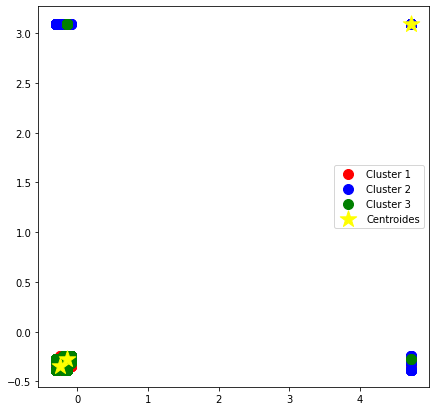

In [72]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.scatter(X[y_kmodes4 == 0, 0], X[y_kmodes4 == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[y_kmodes4 == 1, 0], X[y_kmodes4 == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[y_kmodes4 == 2, 0], X[y_kmodes4 == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(kmodes4.cluster_centroids_[:,0],kmodes4.cluster_centroids_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.legend()

## K modes Escolarida Hombres y Mujeres vs Pueblo Hombres y Mujeres vs Clauni

In [73]:
kmodes4 = KModes(n_clusters=3, init='Huang', n_init=5, verbose=0)
#X = df[['SalePrice','OverallQual','YearBuilt','GarageYrBlt','GarageCars','GrLivArea','GarageArea','YearRemodAdd']]
X = np.array(sample[["eschom","escmuj","clauni","puehom","puemuj"]])
X = sklearn.preprocessing.scale(X)
kmodes4.fit_predict(X)

array([1, 0, 0, ..., 1, 1, 0], dtype=uint16)

In [74]:
centroides4 = kmodes4.cluster_centroids_
y_kmodes4 = kmodes4.predict(X)

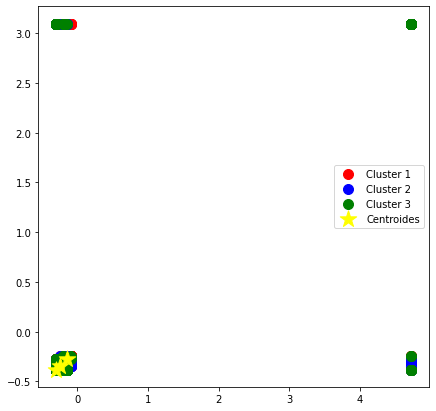

In [75]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.scatter(X[y_kmodes4 == 0, 0], X[y_kmodes4 == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[y_kmodes4 == 1, 0], X[y_kmodes4 == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[y_kmodes4 == 2, 0], X[y_kmodes4 == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(kmodes4.cluster_centroids_[:,0],kmodes4.cluster_centroids_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.legend()

# cluster de todas las variables

In [77]:
sample.head()

,anoreg,mesocu,depocu,edadhom,edadmuj,puehom,puemuj,eschom,escmuj,edad_dif,clauni,combinados
503210,2015,5,4,36.0,27.0,2,1,1.0,1.0,9.0,0,"(2015, 5, 4, 36.0, 27.0, 2, 1, 1.0, 1.0, 9.0, 0)"
479686,2015,7,1,34.0,29.0,1,1,1.0,1.0,5.0,2,"(2015, 7, 1, 34.0, 29.0, 1, 1, 1.0, 1.0, 5.0, 2)"
446285,2015,10,13,22.0,21.0,2,2,3.0,3.0,1.0,0,"(2015, 10, 13, 22.0, 21.0, 2, 2, 3.0, 3.0, 1.0..."
787153,2020,8,10,19.0,19.0,5,5,2.0,0.0,0.0,0,"(2020, 8, 10, 19.0, 19.0, 5, 5, 2.0, 0.0, 0.0, 0)"
488659,2015,4,5,21.0,23.0,2,0,1.0,1.0,2.0,0,"(2015, 4, 5, 21.0, 23.0, 2, 0, 1.0, 1.0, 2.0, 0)"


In [78]:
# give column name
col_name = "edad_dif"
  
# find the index no
index_no = sample.columns.get_loc(col_name)
index_no

9

In [79]:
kmodes8 = KPrototypes(n_clusters=3, init='Huang', n_init=5, verbose=0)
#X = df[['SalePrice','OverallQual','YearBuilt','GarageYrBlt','GarageCars','GrLivArea','GarageArea','YearRemodAdd']]
X = np.array(sample[['anoreg','mesocu','depocu','edadhom', 'edadmuj', 'puehom','puemuj','eschom','escmuj','edad_dif','clauni']])
X = sklearn.preprocessing.scale(X)
kmodes8.fit_predict(X,categorical=[0,1,2,5,6,7,8,10])

array([1, 2, 0, ..., 0, 2, 0], dtype=uint16)

In [80]:
centroides8 = kmodes8.cluster_centroids_
y_kmodes8 = kmodes8.predict(X,categorical=[0,1,2,5,6,7,8,10])

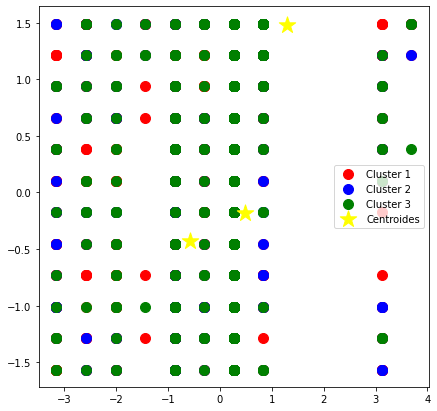

In [81]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.scatter(X[y_kmodes8 == 0, 0], X[y_kmodes8 == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[y_kmodes8 == 1, 0], X[y_kmodes8 == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[y_kmodes8 == 2, 0], X[y_kmodes8 == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(kmodes8.cluster_centroids_[:,0],kmodes8.cluster_centroids_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.legend()

###### Creacion de nuevo df para almacenar el label del k measn

In [82]:
mat_allCluster = sample.copy()

In [83]:
mat_allCluster['K_Labels'] = kmodes8.labels_

In [84]:
mat_allCluster['K_Labels'].value_counts()

0    2087
2     685
1     622
Name: K_Labels, dtype: int64

In [85]:
mat_allCluster = mat_allCluster.drop(["combinados"], axis=1)

In [86]:
mat_allCluster[["edadhom","edadmuj","eschom","escmuj","puehom","puemuj","K_Labels"]].head()

,edadhom,edadmuj,eschom,escmuj,puehom,puemuj,K_Labels
503210,36.0,27.0,1.0,1.0,2,1,1
479686,34.0,29.0,1.0,1.0,1,1,2
446285,22.0,21.0,3.0,3.0,2,2,0
787153,19.0,19.0,2.0,0.0,5,5,0
488659,21.0,23.0,1.0,1.0,2,0,0


# ---------------------------------------------------------------------------------------------------------------

### División train y test

In [88]:
Y = mat_allCluster.pop('K_Labels')
X = mat_allCluster

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42 )

### Modelo Naive Bayes

In [90]:
#importart y crear el modelo
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()

In [91]:
#fit model
bayes.fit(X_train, Y_train)

GaussianNB()

In [92]:
y_predict = bayes.predict(X_test)

In [93]:
print("Mean Squared Error: %f"%mean_squared_error(Y_test, y_predict))
print("R squared: %.2f"%r2_score(Y_test, y_predict))
print('Score: %.2f'%bayes.score(X_test,Y_test))

Mean Squared Error: 0.103042
R squared: 0.84
Score: 0.94


In [94]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (X_test.shape[0], (Y_test != y_predict).sum()))

Number of mislabeled points out of a total 1019 points : 57


### Matriz de Confusion

In [95]:
from sklearn.metrics import confusion_matrix

In [96]:
matris_conf = confusion_matrix(y_true=Y_test, y_pred=y_predict)

In [97]:
from sklearn.metrics import ConfusionMatrixDisplay

<Figure size 720x360 with 0 Axes>

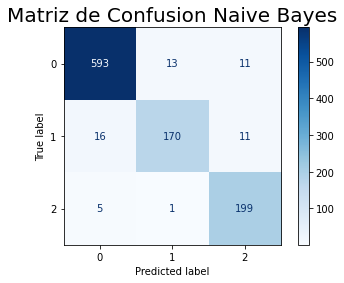

In [98]:
plt.figure(figsize=(10,5))
confusionMatrixDisplay = ConfusionMatrixDisplay(
    confusion_matrix=matris_conf,
    display_labels=bayes.classes_
)
confusionMatrixDisplay.plot(cmap='Blues')
plt.title('Matriz de Confusion Naive Bayes',size=20)
plt.grid(False)

###  Verificar graficamente si existe overfitting

In [99]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

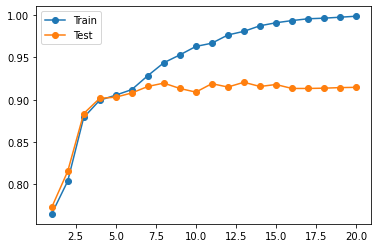

In [100]:
x, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
x_train, x_test,y_train, y_test = train_test_split(x, y,test_size=0.3,train_size=0.7)
train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]
for i in values:
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(x_train, y_train)
    train_yhat = model.predict(x_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    test_yhat = model.predict(x_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

Podemos observar que no hay un overfitting marcado, se presenta  un punto medio en el aprendizaje de nuestro modelo en el que no estemos incurriendo en underfitting y tampoco en overfitting especificamente en el train, en el test muestra un poco de underfitting.

### Cross Validation

In [101]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, KFold

In [102]:
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, Y, cv=5)

In [103]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.01


In [104]:
#Usando KFolds
kf = KFold(n_splits=10)
scores = cross_val_score(bayes, X_train, Y_train, cv=kf, scoring="accuracy")
print("Metricas de la validacion cruzada:", scores)
print("Resultado de la validacion cruzada (Media por Kfolds):", scores.mean())

Metricas de la validacion cruzada: [0.93697479 0.94117647 0.95798319 0.94537815 0.96218487 0.95780591
 0.9535865  0.94514768 0.94092827 0.96202532]
Resultado de la validacion cruzada (Media por Kfolds): 0.9503191149877672


Podemos verificar que realizando la validacion cruzada con svm y usandos Kfolds, la misma esta muy cercana ya que se obtuvo 0.8 y 0.83 aproximadamente.

Esta validación cruzada es un procedimiento utilizado para evitar el sobreajuste y estimar la habilidad del modelo en nuevos datos.

# pruebas de R2

In [105]:
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [106]:
regr = MLPRegressor(random_state=1, max_iter=1000, solver= 'adam', activation= 'relu')
regr.fit(X_train, Y_train)
ypredic = regr.predict(X_test)
#regr.score(X_test, Y_test)
#ypredic

In [107]:
r2_score(Y_test, ypredic)

0.5750928529536232

In [108]:
regr = MLPRegressor(random_state=1, max_iter=1000, solver= 'lbfgs', activation= 'tanh')
regr.fit(X_train, Y_train)
ypredic = regr.predict(X_test)
#regr.score(X_test, Y_test)
#ypredic

In [109]:
r2_score(Y_test, ypredic)

-0.00024381493389213915

In [110]:
regr = MLPRegressor(random_state=1, max_iter=1000, solver= 'lbfgs', activation= 'relu')
regr.fit(X_train, Y_train)
ypredic = regr.predict(X_test)
#regr.score(X_test, Y_test)
#ypredic

In [111]:
r2_score(Y_test, ypredic)

0.6281813856227432

###### con los resultados obtenidos, podemos determinar que los datos estan cerca de la línea de regresión ajustada.  La línea de regresión ajustada en una gráfica representa la ecuación de regresión matemática de nuestros datos.


###### notas: Una línea de regresión ajustada en una gráfica representa la ecuación de regresión matemática de sus datos.

## verificar presicion con DecisionTreeClassifier

In [112]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [113]:
arbol = DecisionTreeClassifier(max_depth=4, random_state=60) 
arbol = arbol.fit(X_train, Y_train)

In [114]:
#predecir y_test con el modelo creado
y_pred_arbol = arbol.predict(X_test)
print ("Accuracy:",metrics.accuracy_score(Y_test, y_pred_arbol))
print ("Precision:", metrics.precision_score(Y_test,y_pred_arbol,average='weighted') )
print ("Recall: ", metrics.recall_score(Y_test,y_pred_arbol,average='weighted'))

Accuracy: 0.9587831207065751
Precision: 0.9590548437693341
Recall:  0.9587831207065751


In [115]:
print("Mean Squared Error: %f"%mean_squared_error(Y_test, y_pred_arbol))
print("R squared: %.2f"%r2_score(Y_test, y_pred_arbol))

Mean Squared Error: 0.061825
R squared: 0.90


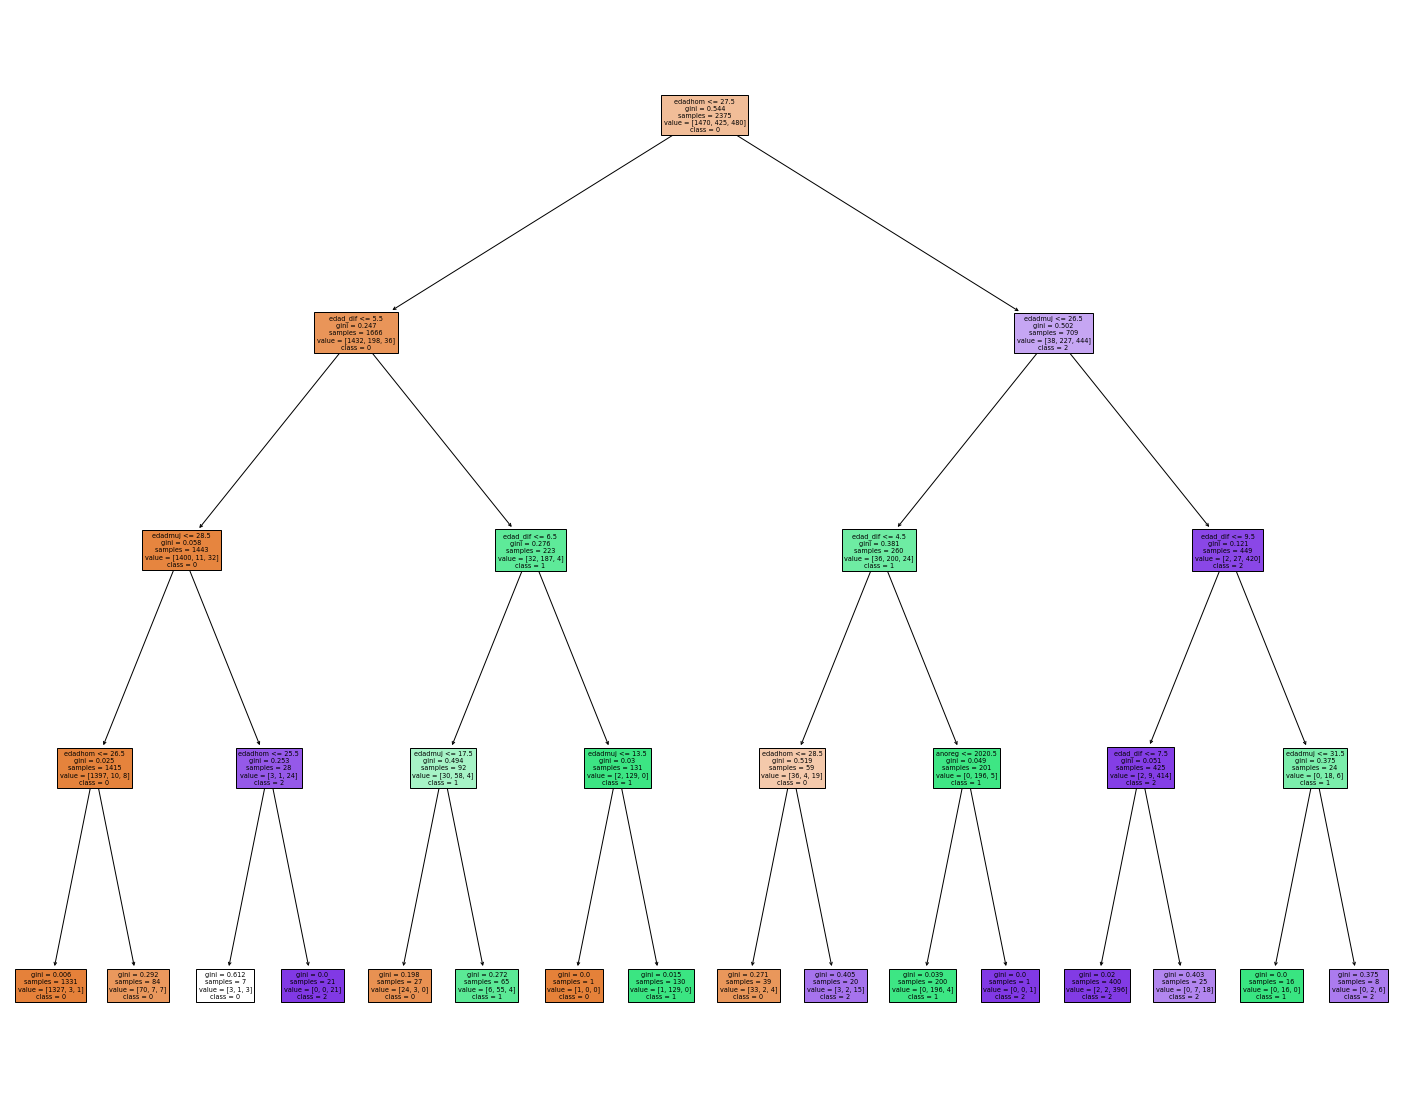

In [116]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(arbol,feature_names=mat_allCluster.columns,
               class_names=['0','1','2'],filled=True )
#save tree as png
fig.savefig('Arbol.png')